# **IF3070 Foundations of Artificial Intelligence | Tugas Besar 2**

**Group Number**: 34

**Group Members**:
- Tamara Mayranda Lubis (18222026)
- Kayla Dyara (18222074)
- Monica Angela Hartono (18222078)
- Yovanka Sandrina Maharaja (18222094)

# **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from collections import defaultdict
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import seaborn as sns
import warnings


# Suppress all warnings globally
warnings.filterwarnings("ignore")

# **Import Dataset**

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1T1zLwmhLFrT4FbnNVYYtV8BABzYght9g')
df.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
1,4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
2,5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
3,6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
4,11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# **A. Data Cleaning**

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

## **I. Handling Missing Data**

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
# Calculating the percentage of missing data for each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

,0
id,0.000000
FILENAME,40.976041
URL,30.972764
URLLength,43.188940
Domain,49.996439
DomainLength,32.989801
IsDomainIP,30.006268
TLD,32.334549
CharContinuationRate,34.216974
TLDLegitimateProb,37.657759


In [ ]:
# Create new data frame
df_new = df.copy()

# Identify binary columns stored as float
binary_columns = [col for col in df_new.select_dtypes(include=['float64', 'int64']).columns if df_new[col].dropna().nunique() == 2]

# Convert identified binary columns to object type
df_new[binary_columns] = df_new[binary_columns].astype('object')

# Convert NoOfURLRedirect and	NoOfSelfRedirect back to float type
df_new['NoOfURLRedirect'] = df_new['NoOfURLRedirect'].astype('float')
df_new['NoOfSelfRedirect'] = df_new['NoOfSelfRedirect'].astype('float')

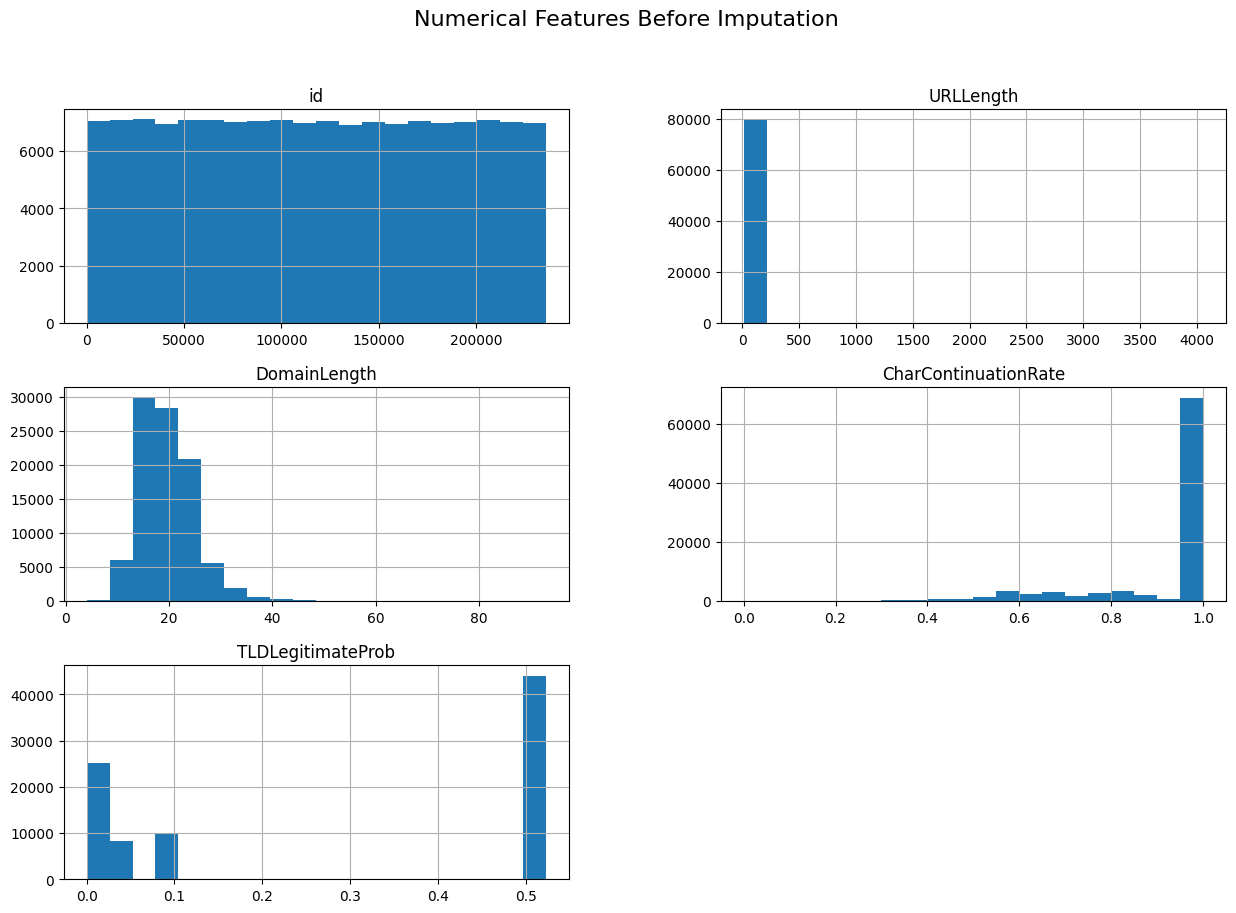

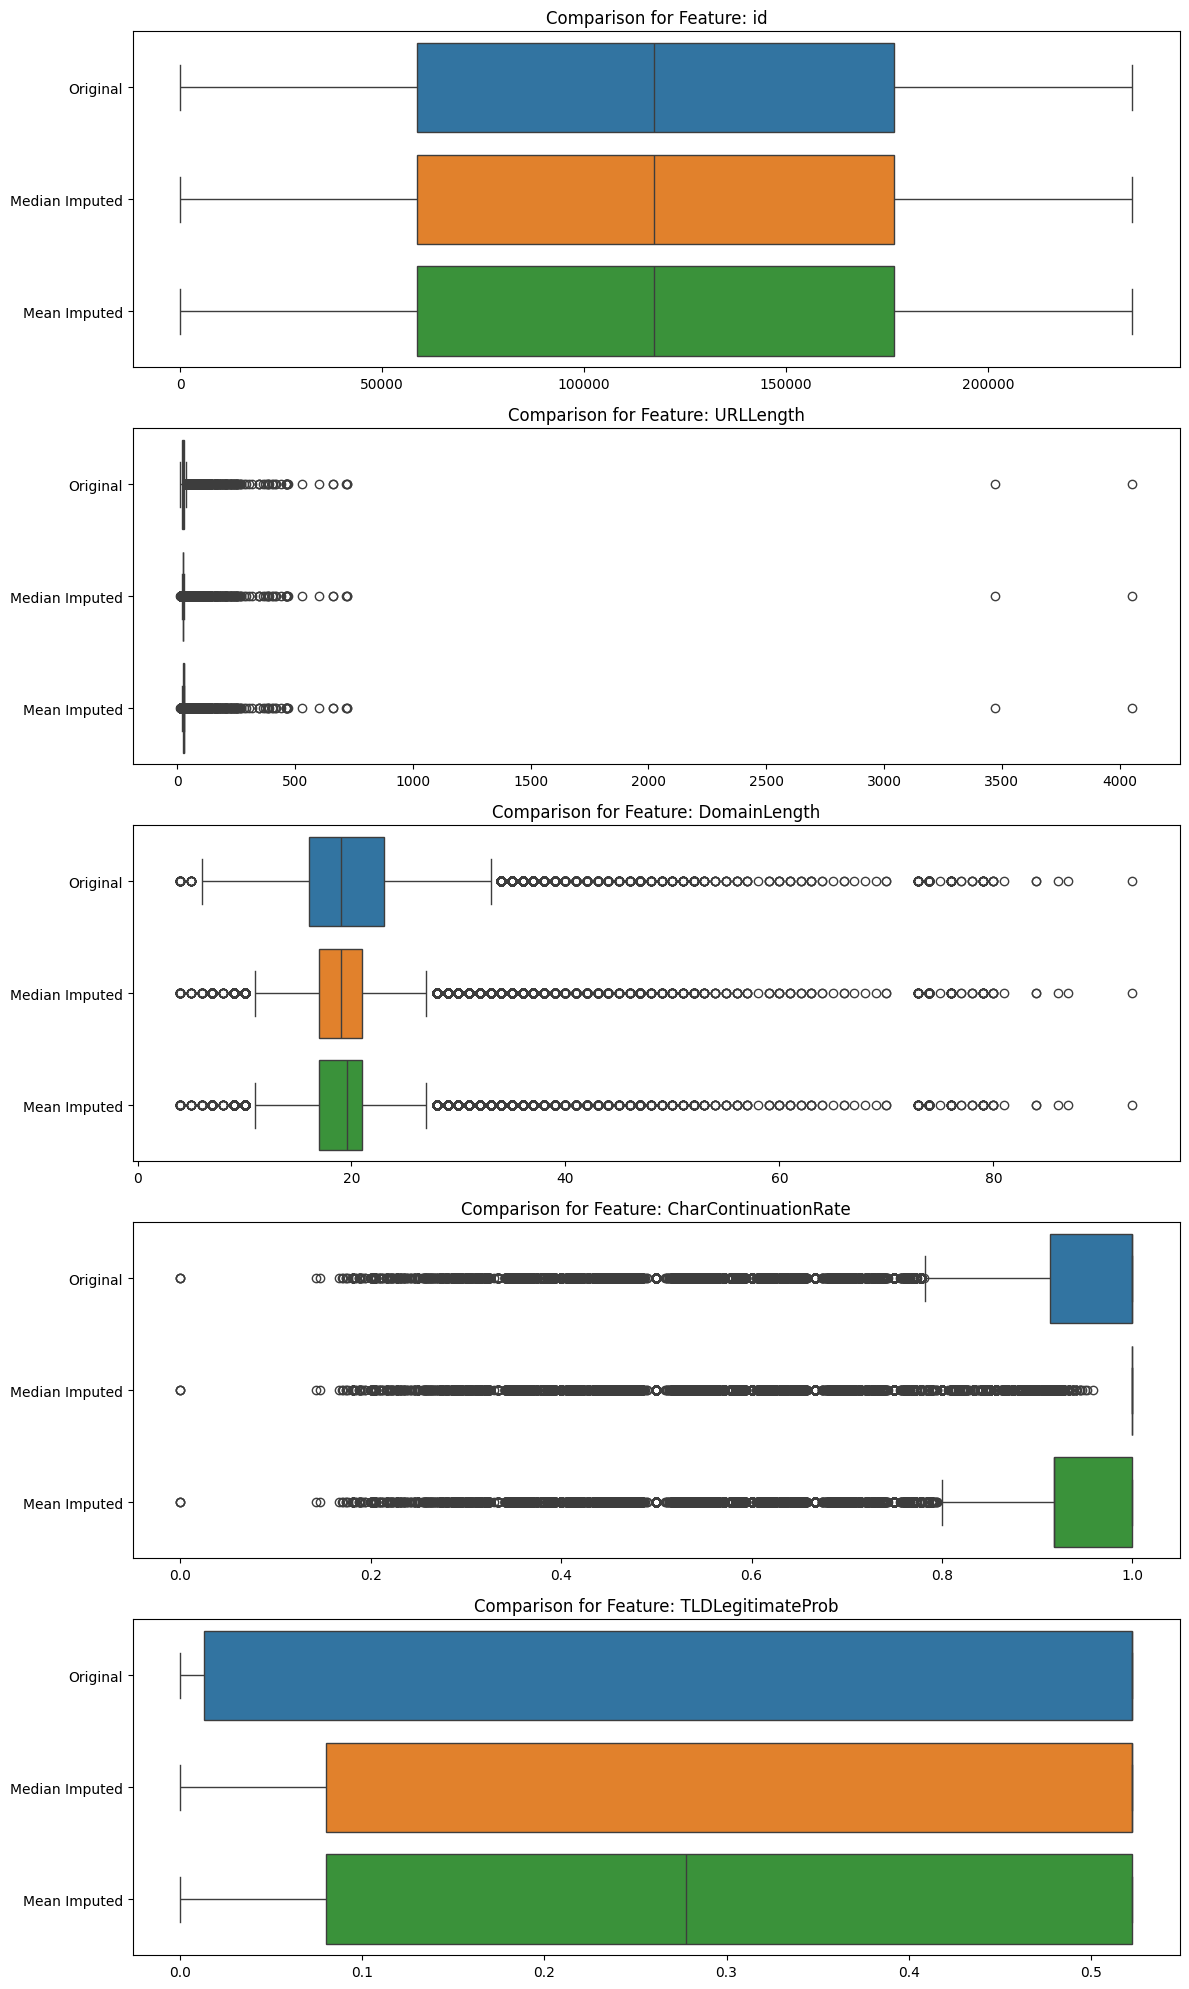

Statistical Comparison Before and After Imputation:
                               mean           std            50%  \
id                    117682.632746  68122.005080  117421.500000   
URLLength                 27.701473     23.140676      26.000000   
DomainLength              19.619387      5.833808      19.000000   
CharContinuationRate       0.918007      0.159142       1.000000   
TLDLegitimateProb          0.277482      0.248115       0.522907   

                        Median Mean           std     Median 50%  \
id                    117682.632746  68122.005080  117421.500000   
URLLength                 26.966625     17.462151      26.000000   
DomainLength              19.415052      4.784404      19.000000   
CharContinuationRate       0.946063      0.134809       1.000000   
TLDLegitimateProb          0.369904      0.229171       0.522907   

                       Mean Imputed           std       Mean 50%  
id                    117682.632746  68122.005080  117421.50000

In [ ]:
# Separate numerical and categorical columns (after converting binary columns)
numerical_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_new.select_dtypes(include=['object']).columns

# Step 1: Visualize distributions before imputation
def plot_feature_distributions(df, columns, title):
    df[columns].hist(bins=20, figsize=(15, 10))
    plt.suptitle(title, fontsize=16)
    plt.show()

# Select a sample of numerical columns for visualization
sample_columns = numerical_columns[:5]  # Choose a subset for demonstration

# Visualize distributions before imputation
plot_feature_distributions(df_new, sample_columns, "Numerical Features Before Imputation")

# Step 2: Compare mean and median imputation
# Impute using mean and median for demonstration
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

mean_imputed = df_new[sample_columns].copy()
median_imputed = df_new[sample_columns].copy()

mean_imputed = mean_imputer.fit_transform(mean_imputed)
median_imputed = median_imputer.fit_transform(median_imputed)

# Step 3: Visualize boxplots to show the effect of imputation
def plot_boxplots(original, imputed_median, imputed_mean, columns):
    fig, axes = plt.subplots(len(columns), 1, figsize=(12, len(columns) * 4))
    for i, col in enumerate(columns):
        sns.boxplot(data=[original[col], imputed_median[:, i], imputed_mean[:, i]],
                    ax=axes[i], orient='h')
        axes[i].set_title(f"Comparison for Feature: {col}")
        axes[i].set_yticklabels(['Original', 'Median Imputed', 'Mean Imputed'])
    plt.tight_layout()
    plt.show()

plot_boxplots(df_new, median_imputed, mean_imputed, sample_columns)

# Step 4: Provide statistical description
original_stats = df_new[sample_columns].describe().T
median_imputed_stats = pd.DataFrame(median_imputed, columns=sample_columns).describe().T
mean_imputed_stats = pd.DataFrame(mean_imputed, columns=sample_columns).describe().T

comparison_stats = pd.concat(
    [original_stats[['mean', 'std', '50%']],  # Original stats
     median_imputed_stats[['mean', 'std', '50%']].rename(columns={'mean': 'Median Mean', '50%': 'Median 50%'}),
     mean_imputed_stats[['mean', 'std', '50%']].rename(columns={'mean': 'Mean Imputed', '50%': 'Mean 50%'})],
    axis=1
)

print("Statistical Comparison Before and After Imputation:")
print(comparison_stats)


In [ ]:
# Separate numerical and categorical columns (after converting binary columns)
numerical_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_new.select_dtypes(include=['object']).columns

# Impute Numerical Features
# For normally distributed numerical data: Use median imputation
median_imputer = SimpleImputer(strategy='median')
df_new[numerical_columns] = median_imputer.fit_transform(df_new[numerical_columns])

# Impute Categorical Features
# For categorical data: Use most frequent value (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_new[categorical_columns] = mode_imputer.fit_transform(df_new[categorical_columns])

In [ ]:
# Calculating again the percentage of missing data for each column after handling missing values
missing_percentage = df_new.isnull().sum() / len(df) * 100
missing_percentage

,0
id,0.0
FILENAME,0.0
URL,0.0
URLLength,0.0
Domain,0.0
DomainLength,0.0
IsDomainIP,0.0
TLD,0.0
CharContinuationRate,0.0
TLDLegitimateProb,0.0


## **II. Dealing with Outliers**

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    return np.abs(z_scores) > threshold

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply outlier detection to numeric columns
numeric_cols = df_new.select_dtypes(include=['float64', 'int64']).columns
outlier_results = {}

for col in numeric_cols:
    if col.lower() in ['id', 'label']:  # Skip ID and label columns
        continue
    col_data = df_new[col].dropna()
    outliers_z = detect_outliers_zscore(col_data)
    outliers_iqr = detect_outliers_iqr(col_data)
    outlier_results[col] = {
        'zscore': outliers_z.sum(),
        'iqr': outliers_iqr.sum(),
        'total': len(col_data)
    }

In [ ]:
# Step 3: Summary of Outliers
outlier_summary = pd.DataFrame(outlier_results).T
if not outlier_summary.empty:
    outlier_summary['zscore_percent'] = (outlier_summary['zscore'] / outlier_summary['total']) * 100
    outlier_summary['iqr_percent'] = (outlier_summary['iqr'] / outlier_summary['total']) * 100

# Display summary
if not outlier_summary.empty:
    print(outlier_summary.sort_values(by='zscore_percent', ascending=False))
else:
    print("No numeric columns for outlier analysis.")


                            zscore    iqr   total  zscore_percent  iqr_percent
NoOfURLRedirect               8885   8885  140404        6.328167     6.328167
CharContinuationRate          3675  23354  140404        2.617447    16.633429
SpacialCharRatioInURL         3600  68234  140404        2.564030    48.598331
DegitRatioInURL               2789   5216  140404        1.986411     3.714994
URLCharProb                   2693  28158  140404        1.918037    20.054984
LetterRatioInURL              2190  51849  140404        1.559785    36.928435
NoOfSelfRedirect              2119   2119  140404        1.509216     1.509216
DomainLength                  1774   8106  140404        1.263497     5.773340
NoOfiFrame                    1636  20945  140404        1.165209    14.917666
NoOfSubDomain                 1512  15938  140404        1.076892    11.351528
LineOfCode                    1398  66954  140404        0.995698    47.686676
NoOfJS                        1371  45928  140404   

In [ ]:
# Z-score handling function
def handle_outliers_zscore(data, features, threshold=3):
    for feature in features:
        mean = data[feature].mean()
        std = data[feature].std()
        lower_limit = mean - threshold * std
        upper_limit = mean + threshold * std
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# IQR handling function
def handle_outliers_iqr(data, features, factor=1.5):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - factor * IQR
        upper_limit = Q3 + factor * IQR
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# Features with Z-score method
zscore_features = [
    'NoOfURLRedirect', 'DomainLength', 'NoOfSelfRedirect',
    'NoOfDegitsInURL', 'NoOfPopup'
]

# Features with IQR method
iqr_features = [
    'CharContinuationRate', 'SpacialCharRatioInURL', 'DegitRatioInURL',
    'URLCharProb', 'LetterRatioInURL', 'NoOfiFrame', 'NoOfSubDomain',
    'LineOfCode', 'NoOfJS', 'NoOfImage', 'NoOfExternalRef',
    'NoOfOtherSpecialCharsInURL', 'NoOfLettersInURL', 'NoOfEmptyRef',
    'URLLength', 'TLDLength', 'LargestLineLength', 'NoOfCSS',
    'DomainTitleMatchScore', 'URLTitleMatchScore'
]

# Handle outliers using Z-score
handle_outliers_zscore(df_new, zscore_features)

# Handle outliers using IQR
handle_outliers_iqr(df_new, iqr_features)

outlier_results = {}

for col in numeric_cols:
    if col.lower() in ['id', 'label']:  # Skip ID and label columns
        continue
    col_data = df_new[col].dropna()
    outliers_z = detect_outliers_zscore(col_data)
    outliers_iqr = detect_outliers_iqr(col_data)
    outlier_results[col] = {
        'zscore': outliers_z.sum(),
        'iqr': outliers_iqr.sum(),
        'total': len(col_data)
    }

# Step 3: Summary of Outliers
outlier_summary = pd.DataFrame(outlier_results).T
if not outlier_summary.empty:
    outlier_summary['zscore_percent'] = (outlier_summary['zscore'] / outlier_summary['total']) * 100
    outlier_summary['iqr_percent'] = (outlier_summary['iqr'] / outlier_summary['total']) * 100

# Display summary
if not outlier_summary.empty:
    print(outlier_summary.sort_values(by='zscore_percent', ascending=False))
else:
    print("No numeric columns for outlier analysis.")

                            zscore    iqr   total  zscore_percent  iqr_percent
NoOfURLRedirect               8885   8885  140404        6.328167     6.328167
DomainLength                  2633   8106  140404        1.875303     5.773340
NoOfDegitsInURL               2614   4861  140404        1.861770     3.462152
NoOfSelfRedirect              2119   2119  140404        1.509216     1.509216
NoOfPopup                     1664   8640  140404        1.185151     6.153671
NoOfSelfRef                    920  16770  140404        0.655252    11.944104
NoOfQMarkInURL                 418    418  140404        0.297712     0.297712
NoOfEqualsInURL                298    298  140404        0.212245     0.212245
NoOfAmpersandInURL              64     64  140404        0.045583     0.045583
ObfuscationRatio                32     32  140404        0.022791     0.022791
NoOfObfuscatedChar              23     23  140404        0.016381     0.016381
URLLength                        0      0  140404   

## **III. Remove Duplicates**
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# Check for duplicates
duplicates = df_new.duplicated()

# Count the number of True and False
duplicate_counts = duplicates.value_counts()

# Print the results
print("Duplicates in DataFrame:")
print(duplicate_counts)

Duplicates in DataFrame:
False    140404
Name: count, dtype: int64


## **IV. Feature Engineering**

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
# Polynomial Features:
polynomial_features = ['CharContinuationRate', 'URLCharProb']
for feature in polynomial_features:
    df_new[f'{feature}_squared'] = df_new[feature] ** 2
    df_new[f'{feature}_cubed'] = df_new[feature] ** 3

# Interaction Features:
df_new['Length_SpecialCharRatio'] = df_new['DomainLength'] * df_new['SpacialCharRatioInURL']

# Binning or Discretization:
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
df_new['URLLength_binned'] = pd.cut(df_new['URLLength'], bins=bins, labels=labels)

# Aggregation Features:
df_new['LetterDigitRatio'] = df_new['LetterRatioInURL'] / (df_new['DegitRatioInURL'] + 1e-9)

# Domain-Specific Features:
df_new['SpecialCharToTotalLength'] = df_new['SpacialCharRatioInURL'] * df_new['URLLength']

# Binary Features from Counts:
df_new['HighRedirects'] = (df_new['NoOfURLRedirect'] > 5).astype(int)
df_new['HighPopups'] = (df_new['NoOfPopup'] > 3).astype(int)

# Log Transformation
skewed_features = ['NoOfJS', 'NoOfiFrame', 'NoOfSelfRedirect']
for feature in skewed_features:
    df_new[f'{feature}_log'] = np.log1p(df_new[feature])

# **B. Split Training Set and Validation Set**

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
train_set, val_set = train_test_split(df_new, test_size=0.2, random_state=1, stratify=df_new['label'])

# To extract all features except the last one, which is the label.
x_train = train_set.iloc[:, :-1].values
x_val = val_set.iloc[:, :-1].values
# To extract the last feature, which is the label.
y_train = train_set.iloc[:, -1].values
y_val = train_set.iloc[:, -1].values

# **C. Data Preprocessing**

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, numerical_columns=None):
        self.numerical_columns = numerical_columns
        self.scaler = StandardScaler()
        self.imputer = SimpleImputer(strategy="mean")

    def fit(self, X, y=None):
        self.imputer.fit(X[self.numerical_columns])
        self.scaler.fit(self.imputer.transform(X[self.numerical_columns]))
        return self

    def transform(self, X):
        X[self.numerical_columns] = self.imputer.transform(X[self.numerical_columns])
        X[self.numerical_columns] = self.scaler.transform(X[self.numerical_columns])
        return X


### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_columns=None):
        self.categorical_columns = categorical_columns
        self.encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
        self.imputer = SimpleImputer(strategy="most_frequent")

    def fit(self, X, y=None):
        self.imputer.fit(X[self.categorical_columns])
        self.encoder.fit(self.imputer.transform(X[self.categorical_columns]))
        return self

    def transform(self, X):
        X[self.categorical_columns] = self.imputer.transform(X[self.categorical_columns])
        X[self.categorical_columns] = self.encoder.transform(X[self.categorical_columns])
        return X

### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
class HandleImbalance(BaseEstimator, TransformerMixin):
    def __init__(self, strategy="undersample"):
        self.strategy = strategy
        if self.strategy == "undersample":
            self.sampler = RandomUnderSampler(sampling_strategy='auto')
        elif self.strategy == "oversample":
            self.sampler = SMOTE(sampling_strategy='auto')
        else:
            raise ValueError("Unknown sampling strategy")

    def fit(self, X, y):
        self.sampler.fit_resample(X, y)
        return self

    def fit_resample(self, X, y):
        return self.sampler.fit_resample(X, y)

    def transform(self, X, y=None):
        X_resampled, y_resampled = self.sampler.fit_resample(X, y)
        return X_resampled, y_resampled

### IV. Dimensionality Reduction

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD

class DimensionalityReduction(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=0.95, method="SVD"):
        self.n_components = n_components
        self.reducer = TruncatedSVD(n_components=self.n_components)

    def fit(self, X, y=None):
        self.reducer.fit(X)
        return self

    def transform(self, X):
        return self.reducer.transform(X)

### V. Normalization

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

class Normalization(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = MinMaxScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features
numerical_features = train_set.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = train_set.select_dtypes(include=["object"]).columns.tolist()

# Ensure 'label' column is not included in features (both numerical and categorical)
numerical_features = [col for col in numerical_features if col != 'label']
categorical_features = [col for col in categorical_features if col != 'label']

# Split features (X) and target (y) for training and validation sets
X_train = train_set[numerical_features + categorical_features]
y_train = train_set['label']

X_val = val_set[numerical_features + categorical_features]
y_val = val_set['label']

# Check if there are any NaN values in the target column
print("Check for NaN in target column:")
print(y_train.isna().sum())

# Ensure the target is of categorical data type (e.g., 0 or 1 for binary classification)
y_train = y_train.astype(int)
y_val = y_val.astype(int)

# Check class distribution to ensure valid target
print("Distribution of target in y_train:")
print(y_train.value_counts())  # Display class distribution of target

# Define preprocessing pipeline
def preprocessing_pipeline(strategy="undersample", n_components=10):
    # Numerical preprocessing pipeline
    numerical_pipeline = Pipeline([
        ("scaler", FeatureScaler(numerical_columns=numerical_features))
    ])

    # Categorical preprocessing pipeline
    categorical_pipeline = Pipeline([
        ("encoder", FeatureEncoder(categorical_columns=categorical_features))
    ])

    # Combined preprocessing with ColumnTransformer
    preprocessing = ColumnTransformer([
        ("numerical", numerical_pipeline, numerical_features),
        ("categorical", categorical_pipeline, categorical_features)
    ])

    # Full pipeline excluding imbalance handling
    preprocessing_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("reduction", DimensionalityReduction(n_components=n_components)),
        ("normalization", Normalization())
    ])

    return preprocessing_pipeline, HandleImbalance(strategy=strategy)

# Create pipeline
preprocessing_pipeline, imbalance_handler = preprocessing_pipeline(strategy="undersample", n_components=45)

# Preprocess and balance the training data
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
X_train_balanced, y_train_balanced = imbalance_handler.fit_resample(X_train_preprocessed, y_train)

# Preprocess the validation data (without balancing)
X_val_preprocessed = preprocessing_pipeline.transform(X_val)

X_val_balanced = X_val_preprocessed
y_val_balanced = y_val

# Confirm the shape of the data after preprocessing
print(f"Shape of preprocessed training data: {X_train_preprocessed.shape}")
print(f"Shape of preprocessed validation data: {X_val_preprocessed.shape}")

# Confirm the shape of the data after balancing
print(f"Shape of preprocessed training data: {X_train_balanced.shape}")
print(f"Shape of preprocessed validation data: {X_val_balanced.shape}")

Check for NaN in target column:
0
Distribution of target in y_train:
label
1    103880
0      8443
Name: count, dtype: int64
Shape of preprocessed training data: (112323, 45)
Shape of preprocessed validation data: (28081, 45)
Shape of preprocessed training data: (16886, 45)
Shape of preprocessed validation data: (28081, 45)


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class KNN:
    def __init__(self, k, metric, p):
        """
        Initialize parameters: k, distance metric, and p (for Minkowski metric).
        """
        self.k = k
        self.metric = metric
        self.p = p
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """
        Store training data (X_train and y_train) as attributes.
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def _distance(self, X):
        """
        Compute distances between test points and training points based on the selected metric.
        """
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((self.X_train - X[:, np.newaxis]) ** 2, axis=2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(self.X_train - X[:, np.newaxis]), axis=2)
        elif self.metric == 'minkowski':
            return np.sum(np.abs(self.X_train - X[:, np.newaxis]) ** self.p, axis=2) ** (1 / self.p)
        else:
            raise ValueError("Unknown metric: Choose 'euclidean', 'manhattan', or 'minkowski'")

    def predict(self, X):
        """
        Predict the class labels for the input data.
        """
        X = np.array(X)
        distances = self._distance(X)
        k_neighbors = np.argsort(distances, axis=1)[:, :self.k]
        k_labels = self.y_train[k_neighbors]
        predictions = [np.bincount(labels).argmax() for labels in k_labels]
        return np.array(predictions)

    def batch_predict(self, X, batch_size=100):
        """
        Predicts the labels for the input data in batches.
        """
        predictions = []
        for i in range(0, len(X), batch_size):
            batch = X[i:i+batch_size]
            batch_predictions = self.predict(batch)
            predictions.extend(batch_predictions)
        return np.array(predictions)

KNN (from scratch) Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.90      0.49      2111
           1       0.99      0.86      0.92     25970

    accuracy                           0.86     28081
   macro avg       0.67      0.88      0.71     28081
weighted avg       0.94      0.86      0.89     28081

KNN Accuracy: 0.8612585021900929


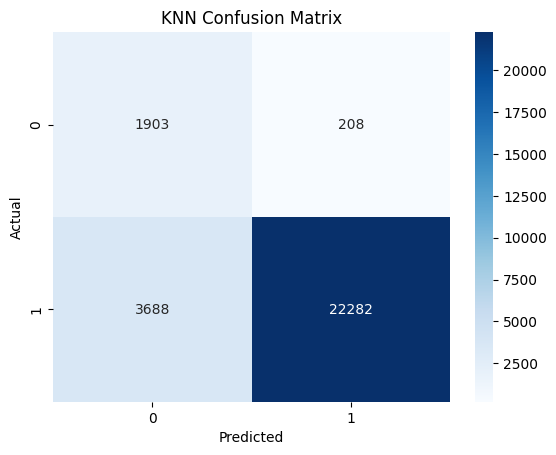

In [ ]:
# Inisialisasi dan pelatihan model KNN
knn = KNN(k=3, metric='minkowski', p=3)
knn.fit(X_train_balanced, y_train_balanced)

# Prediksi pada data validasi
y_predictions = knn.batch_predict(X_val_balanced, batch_size=100)

# Evaluasi performa model
print("KNN (from scratch) Classification Report:")
print(classification_report(y_val, y_predictions))
knn_accuracy = accuracy_score(y_val, y_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- K-Nearest Neighbors ---
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.92      0.49      2111
           1       0.99      0.85      0.92     25970

    accuracy                           0.86     28081
   macro avg       0.67      0.89      0.71     28081
weighted avg       0.94      0.86      0.89     28081

KNN Accuracy: 85.81%


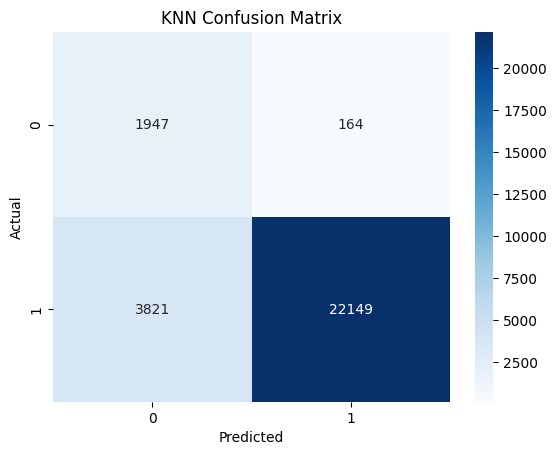

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-Nearest Neighbors (KNeighborsClassifier)
print("\n--- K-Nearest Neighbors ---")
k = 3  # Nilai K
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Gunakan data hasil resampling untuk melatih model
knn_classifier.fit(X_train_balanced, y_train_balanced)

# Prediksi pada data validasi
y_pred_knn = knn_classifier.predict(X_val_balanced)

# Evaluasi KNN
print("KNN Classification Report:")
print(classification_report(y_val, y_pred_knn))
knn_accuracy = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")

# Matriks Kebingungan
conf_matrix = confusion_matrix(y_val, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## B. Naive Bayes


--- Naive Bayes ---
Gaussian Naive Bayes (from scratch) Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.40      0.53      2111
           1       0.95      0.99      0.97     25970

    accuracy                           0.95     28081
   macro avg       0.88      0.69      0.75     28081
weighted avg       0.94      0.95      0.94     28081

Accuracy: 0.9476158256472348


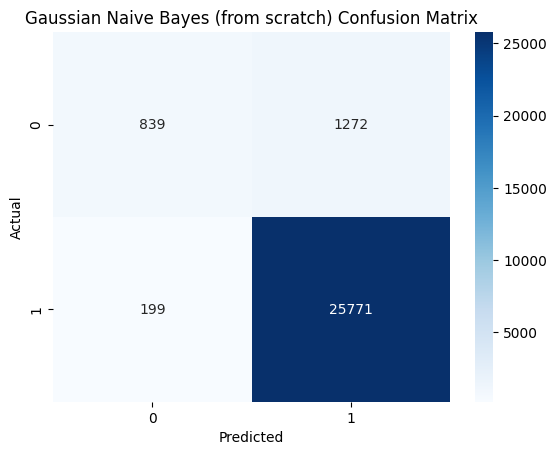

In [ ]:
# Gaussian Naive Bayes Implementation From Scratch
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.class_stats = {}

    def fit(self, X, y):
        """
        X: Training features (numpy array)
        y: Training labels (numpy array)
        """
        self.classes = np.unique(y)  # Identify unique classes
        self.class_stats = defaultdict(dict)

        for c in self.classes:
            X_c = X[y == c]  # Filter data belonging to class c
            self.class_stats[c]['mean'] = X_c.mean(axis=0)
            self.class_stats[c]['std'] = X_c.std(axis=0)
            self.class_stats[c]['prior'] = X_c.shape[0] / X.shape[0]  # P(c)

    def _calculate_likelihood(self, X, mean, std):
        """Calculate Gaussian likelihood for given data."""
        eps = 1e-9  # Small constant to avoid division by zero
        coeff = 1 / (np.sqrt(2 * np.pi) * std + eps)
        exponent = -((X - mean) ** 2) / (2 * (std ** 2 + eps))
        return coeff * np.exp(exponent)

    def _calculate_posterior(self, X):
        """Calculate posterior probabilities for each class."""
        posteriors = []

        for c in self.classes:
            prior = np.log(self.class_stats[c]['prior'])  # log(P(c))
            likelihood = np.sum(
                np.log(self._calculate_likelihood(X, self.class_stats[c]['mean'], self.class_stats[c]['std']))
            )  # log(P(x|c))
            posterior = prior + likelihood  # log(P(c)) + log(P(x|c))
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        """Predict class labels for the given data."""
        return np.array([self._calculate_posterior(x) for x in X])

gnb_scratch = GaussianNaiveBayes()
gnb_scratch.fit(X_train_balanced, y_train_balanced)
y_pred_scratch = gnb_scratch.predict(X_val_balanced)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n--- Naive Bayes ---")
print("Gaussian Naive Bayes (from scratch) Classification Report:")
print(classification_report(y_val, y_pred_scratch))
scratch_accuracy = accuracy_score(y_val, y_pred_scratch)
print(f"Accuracy: {scratch_accuracy}")

# Confusion Matrix
conf_matrix_scratch = confusion_matrix(y_val, y_pred_scratch)
sns.heatmap(conf_matrix_scratch, annot=True, fmt='d', cmap="Blues")
plt.title("Gaussian Naive Bayes (from scratch) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Naive Bayes ---
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.40      0.53      2111
           1       0.95      0.99      0.97     25970

    accuracy                           0.95     28081
   macro avg       0.88      0.70      0.75     28081
weighted avg       0.94      0.95      0.94     28081

Naive Bayes Accuracy: 94.77%


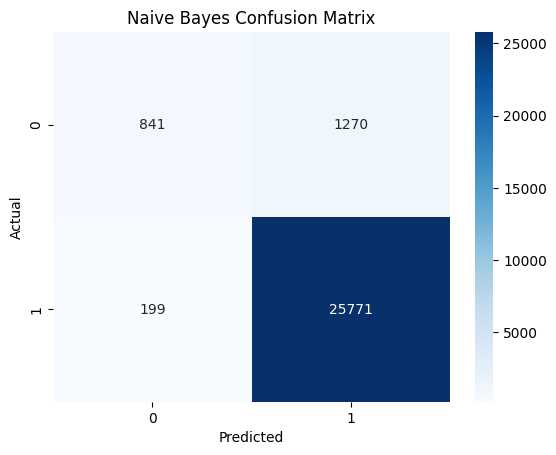

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes Classifier (GaussianNB)
print("\n--- Naive Bayes ---")
nb = GaussianNB()

# Melatih model dengan data yang sudah diresampling
nb.fit(X_train_balanced, y_train_balanced)

# Melakukan prediksi pada data validasi
y_pred_nb = nb.predict(X_val_balanced)

# Evaluasi Naive Bayes
print("Naive Bayes Classification Report:")
print(classification_report(y_val, y_pred_nb))
nb_accuracy = accuracy_score(y_val, y_pred_nb)
print(f"Naive Bayes Accuracy: {nb_accuracy * 100:.2f}%")

# Matriks Kebingungan Naive Bayes
conf_matrix_nb = confusion_matrix(y_val, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualize Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Visualize ROC Curve
def plot_roc_curve(y_true, y_pred_proba, classes):
    y_true_binarized = label_binarize(y_true, classes=classes)
    fpr, tpr, roc_auc = {}, {}, {}

    for i, c in enumerate(classes):
        fpr[c], tpr[c], _ = roc_curve(y_true_binarized[:, i], y_pred_proba[:, i])
        roc_auc[c] = auc(fpr[c], tpr[c])

    plt.figure()
    for c in classes:
        plt.plot(fpr[c], tpr[c], label=f"Class {c} (AUC = {roc_auc[c]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

# Hyperparameter Tuning for KNN
def knn_tuning(knn_instance, X_train, y_train, X_val, y_val):
    print("Tuning KNN...")
    param_grid = {'k': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan', 'minkowski'], 'p': [1, 2, 3]}
    best_params, best_score = None, -np.inf

    for k in param_grid['k']:
        for metric in param_grid['metric']:
            for p in param_grid['p'] if metric == 'minkowski' else [None]:
                knn_instance.k = k
                knn_instance.metric = metric
                knn_instance.p = p if p else 2

                scores = cross_val_score(knn_instance, X_train, y_train, cv=5, scoring='accuracy')
                mean_score = np.mean(scores)

                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {'k': k, 'metric': metric, 'p': p}

    print(f"Best Parameters: {best_params}")
    print(f"Best Cross-Validation Score: {best_score:.4f}")

    knn_instance.k = best_params['k']
    knn_instance.metric = best_params['metric']
    knn_instance.p = best_params['p']

    knn_instance.fit(X_train, y_train)
    y_pred = knn_instance.predict(X_val)

    print("Classification Report for KNN:")
    print(classification_report(y_val, y_pred))
    return knn_instance, y_pred

# Hyperparameter Tuning for Naive Bayes
def gnb_tuning(gnb_instance, X_train, y_train, X_val, y_val):
    print("Tuning Naive Bayes...")
    param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}
    grid_search = GridSearchCV(gnb_instance, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_gnb = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

    y_pred = best_gnb.predict(X_val)
    print("Classification Report for Naive Bayes:")
    print(classification_report(y_val, y_pred))

    return best_gnb, y_pred

# Main Execution
def main_improvements(X_train, y_train, X_val, y_val, classes, knn_instance, gnb_instance):
    # Hyperparameter Tuning for KNN
    knn_instance, knn_pred = knn_tuning(knn_instance, X_train, y_train, X_val, y_val)

    # Hyperparameter Tuning for Naive Bayes
    gnb_instance, y_pred_gnb = gnb_tuning(gnb_instance, X_train, y_train, X_val, y_val)

    # Visualize Confusion Matrices
    print("\nConfusion Matrix for KNN:")
    plot_confusion_matrix(y_val, knn_pred, classes)

    print("\nConfusion Matrix for Naive Bayes:")
    plot_confusion_matrix(y_val, y_pred_gnb, classes)

    print("\nPlotting ROC Curve for KNN...")
    if hasattr(knn_instance, "predict_proba"):
        y_pred_proba_knn = knn_instance.predict_proba(X_val)
        plot_roc_curve(y_val, y_pred_proba_knn, classes)

    print("\nPlotting ROC Curve for Naive Bayes...")
    y_pred_proba_gnb = gnb_instance.predict_proba(X_val)
    plot_roc_curve(y_val, y_pred_proba_gnb, classes)

    return knn_instance, gnb_instance

## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [ ]:
test_df = pd.read_csv('test.csv')

# Add the 'label' column filled with 0
test_df['label'] = 0

# Create new data frame
test_df_new = test_df.copy()

# Identify binary columns stored as float
binary_columns = [col for col in test_df_new.select_dtypes(include=['float64', 'int64']).columns if test_df_new[col].dropna().nunique() == 2]

# Convert identified binary columns to object type
test_df_new[binary_columns] = test_df_new[binary_columns].astype('object')

# Convert NoOfURLRedirect and	NoOfSelfRedirect back to float type
test_df_new['NoOfURLRedirect'] = test_df_new['NoOfURLRedirect'].astype('float')
test_df_new['NoOfSelfRedirect'] = test_df_new['NoOfSelfRedirect'].astype('float')

# Separate numerical and categorical columns (after converting binary columns)
numerical_columns = test_df_new.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = test_df_new.select_dtypes(include=['object']).columns

# Select a sample of numerical columns for visualization
sample_columns = numerical_columns[:5]

# Impute using mean and median for demonstration
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

mean_imputed = test_df_new[sample_columns].copy()
median_imputed = test_df_new[sample_columns].copy()

mean_imputed = mean_imputer.fit_transform(mean_imputed)
median_imputed = median_imputer.fit_transform(median_imputed)

# Separate numerical and categorical columns (after converting binary columns)
numerical_columns = test_df_new.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = test_df_new.select_dtypes(include=['object']).columns

# Impute Numerical Features
# For normally distributed numerical data: Use median imputation
median_imputer = SimpleImputer(strategy='median')
test_df_new[numerical_columns] = median_imputer.fit_transform(test_df_new[numerical_columns])

# Impute Categorical Features
# For categorical data: Use most frequent value (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
test_df_new[categorical_columns] = mode_imputer.fit_transform(test_df_new[categorical_columns])

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=3):
    z_scores = (data - np.mean(data)) / np.std(data)
    return np.abs(z_scores) > threshold

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Apply outlier detection to numeric columns
numeric_cols = test_df_new.select_dtypes(include=['float64', 'int64']).columns
outlier_results = {}

for col in numeric_cols:
    if col.lower() in ['id', 'label']:
        continue
    col_data = test_df_new[col].dropna()
    outliers_z = detect_outliers_zscore(col_data)
    outliers_iqr = detect_outliers_iqr(col_data)
    outlier_results[col] = {
        'zscore': outliers_z.sum(),
        'iqr': outliers_iqr.sum(),
        'total': len(col_data)
    }

outlier_summary = pd.DataFrame(outlier_results).T
if not outlier_summary.empty:
    outlier_summary['zscore_percent'] = (outlier_summary['zscore'] / outlier_summary['total']) * 100
    outlier_summary['iqr_percent'] = (outlier_summary['iqr'] / outlier_summary['total']) * 100


# Z-score handling function
def handle_outliers_zscore(data, features, threshold=3):
    for feature in features:
        mean = data[feature].mean()
        std = data[feature].std()
        lower_limit = mean - threshold * std
        upper_limit = mean + threshold * std
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# IQR handling function
def handle_outliers_iqr(data, features, factor=1.5):
    for feature in features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - factor * IQR
        upper_limit = Q3 + factor * IQR
        data[feature] = np.clip(data[feature], lower_limit, upper_limit)

# Features with Z-score method
zscore_features = [
    'NoOfURLRedirect', 'DomainLength', 'NoOfSelfRedirect',
    'NoOfDegitsInURL', 'NoOfPopup'
]

# Features with IQR method
iqr_features = [
    'CharContinuationRate', 'SpacialCharRatioInURL', 'DegitRatioInURL',
    'URLCharProb', 'LetterRatioInURL', 'NoOfiFrame', 'NoOfSubDomain',
    'LineOfCode', 'NoOfJS', 'NoOfImage', 'NoOfExternalRef',
    'NoOfOtherSpecialCharsInURL', 'NoOfLettersInURL', 'NoOfEmptyRef',
    'URLLength', 'TLDLength', 'LargestLineLength', 'NoOfCSS',
    'DomainTitleMatchScore', 'URLTitleMatchScore'
]

# Handle outliers using Z-score
handle_outliers_zscore(test_df_new, zscore_features)

# Handle outliers using IQR
handle_outliers_iqr(test_df_new, iqr_features)

outlier_results = {}

for col in numeric_cols:
    if col.lower() in ['id', 'label']:
        continue
    col_data = test_df_new[col].dropna()
    outliers_z = detect_outliers_zscore(col_data)
    outliers_iqr = detect_outliers_iqr(col_data)
    outlier_results[col] = {
        'zscore': outliers_z.sum(),
        'iqr': outliers_iqr.sum(),
        'total': len(col_data)
    }

outlier_summary = pd.DataFrame(outlier_results).T
if not outlier_summary.empty:
    outlier_summary['zscore_percent'] = (outlier_summary['zscore'] / outlier_summary['total']) * 100
    outlier_summary['iqr_percent'] = (outlier_summary['iqr'] / outlier_summary['total']) * 100


# Polynomial Features:
polynomial_features = ['CharContinuationRate', 'URLCharProb']
for feature in polynomial_features:
    test_df_new[f'{feature}_squared'] = test_df_new[feature] ** 2
    test_df_new[f'{feature}_cubed'] = test_df_new[feature] ** 3

# Interaction Features:
test_df_new['Length_SpecialCharRatio'] = test_df_new['DomainLength'] * test_df_new['SpacialCharRatioInURL']

# Binning or Discretization:
bins = [0, 50, 100, 150, 200, np.inf]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
test_df_new['URLLength_binned'] = pd.cut(test_df_new['URLLength'], bins=bins, labels=labels)

# Aggregation Features:
test_df_new['LetterDigitRatio'] = test_df_new['LetterRatioInURL'] / (test_df_new['DegitRatioInURL'] + 1e-9)

# Domain-Specific Features:
test_df_new['SpecialCharToTotalLength'] = test_df_new['SpacialCharRatioInURL'] * test_df_new['URLLength']

# Binary Features from Counts:
test_df_new['HighRedirects'] = (test_df_new['NoOfURLRedirect'] > 5).astype(int)
test_df_new['HighPopups'] = (test_df_new['NoOfPopup'] > 3).astype(int)

# Log Transformation:
skewed_features = ['NoOfJS', 'NoOfiFrame', 'NoOfSelfRedirect']
for feature in skewed_features:
    test_df_new[f'{feature}_log'] = np.log1p(test_df_new[feature])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

numerical_features = df_new.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df_new.select_dtypes(include=["object"]).columns.tolist()

numerical_features = [col for col in numerical_features if col != 'label']
categorical_features = [col for col in categorical_features if col != 'label']

X_train = df_new[numerical_features + categorical_features]
y_train = df_new['label']

X_val = test_df_new[numerical_features + categorical_features]
y_val = test_df_new['label']

print("Check for NaN in target column:")
print(y_train.isna().sum())

y_train = y_train.astype(int)
y_val = y_val.astype(int)

print("Distribution of target in y_train:")
print(y_train.value_counts())

numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(class_weight='balanced'))
])

# Preprocessing dan pelatihan model pada data latih
pipe.fit(X_train, y_train)

# Evaluasi pada data validasi
y_val_pred = pipe.predict(X_val)

print(f"Shape of training data: {X_train.shape}")
print(f"Shape of validation data: {X_val.shape}")


Check for NaN in target column:
0
Distribution of target in y_train:
label
1    129850
0     10554
Name: count, dtype: int64
Shape of training data: (140404, 67)
Shape of validation data: (10000, 67)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Terapkan preprocessing sebelum balancing
scaler = StandardScaler()

numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns

# Scaling pada X_train sebelum resampling
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

# Scaling pada X_val
X_val_scaled = scaler.transform(X_val[numerical_columns])

from sklearn.linear_model import LogisticRegression

# Model dengan class weight
model = LogisticRegression(class_weight='balanced')

# Latih model tanpa mengubah jumlah data
model.fit(X_train_scaled, y_train)

X_train_scaled.shape
X_val_scaled.shape

(10000, 45)

Gaussian Naive Bayes (from scratch) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.50     10000
   macro avg       0.50      0.25      0.33     10000
weighted avg       1.00      0.50      0.67     10000

KNN Accuracy: 0.5


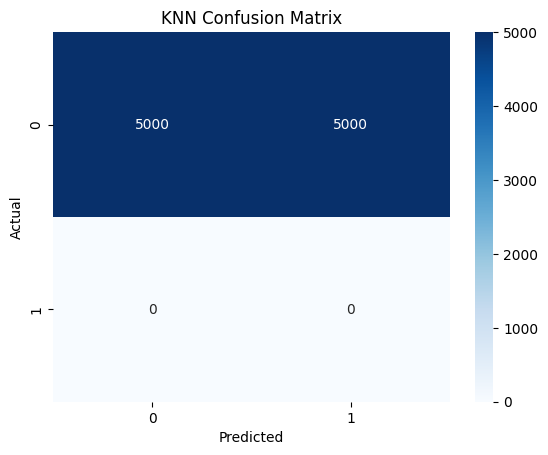

In [ ]:
from sklearn.metrics import accuracy_score
# Inisialisasi dan pelatihan model KNN
knn = KNN(k=3, metric='minkowski', p=3)
knn.fit(X_train_scaled, y_train)

# Prediksi pada data validasi
y_predictions_knn = knn.batch_predict(X_val_scaled, batch_size=100)

# Evaluasi performa model
print("KNN (from scratch) Classification Report:")
print(classification_report(y_val, y_predictions_knn))
knn_accuracy = accuracy_score(y_val, y_predictions_knn)
print(f"KNN Accuracy: {knn_accuracy}")

# Matriks kebingungan
conf_matrix = confusion_matrix(y_val, y_predictions_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


--- Naive Bayes ---
Gaussian Naive Bayes (from scratch) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91     10000
           1       0.00      0.00      0.00         0

    accuracy                           0.84     10000
   macro avg       0.50      0.42      0.46     10000
weighted avg       1.00      0.84      0.91     10000

Accuracy: 0.8417


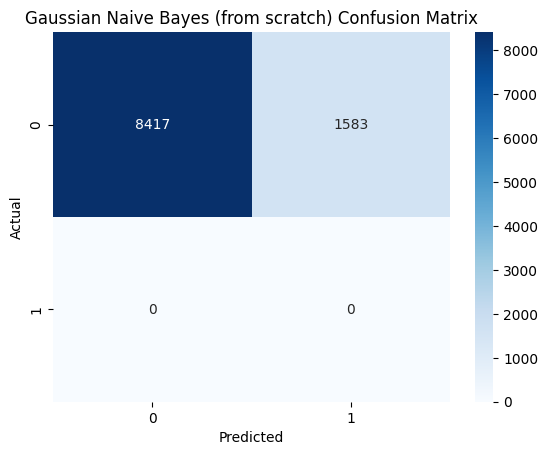

In [ ]:
gnb_scratch = GaussianNaiveBayes()
gnb_scratch.fit(X_train_scaled, y_train)
y_pred_scratch_gnb = gnb_scratch.predict(X_val_scaled)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\n--- Naive Bayes ---")
print("Gaussian Naive Bayes (from scratch) Classification Report:")
print(classification_report(y_val, y_pred_scratch_gnb))
scratch_accuracy = accuracy_score(y_val, y_pred_scratch_gnb)
print(f"Accuracy: {scratch_accuracy}")

# Confusion Matrix
conf_matrix_scratch = confusion_matrix(y_val, y_pred_scratch_gnb)
sns.heatmap(conf_matrix_scratch, annot=True, fmt='d', cmap="Blues")
plt.title("Gaussian Naive Bayes (from scratch) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd

model_mapping = {
    "KNN": knn,
    "Naive Bayes": gnb_scratch,
}

validation_predictions = {
    "KNN": y_predictions_knn,
    "Naive Bayes": y_pred_scratch_gnb,
}

# Xount model accuration
accuracy_results = {
    model_name: accuracy_score(y_val, y_preds)
    for model_name, y_preds in validation_predictions.items()
}

# Decide best model
best_model_name = max(accuracy_results, key=accuracy_results.get)
best_model = model_mapping[best_model_name]

print(f"Model terbaik adalah: {best_model_name} dengan akurasi {accuracy_results[best_model_name]:.4f}")

# Prediction using best model
test_preds = best_model.predict(X_val_scaled)

test_ids = X_val['id']

submission_df = pd.DataFrame({
    'id': test_ids,
    'label': test_preds
})

submission_file = 'submission1.csv'
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved as {submission_file}")

Model terbaik adalah: Naive Bayes dengan akurasi 0.8417
Submission file saved as submission1.csv


In [ ]:
import pandas as pd

test_ids = X_val['id']

submission_df = pd.DataFrame({
    'id': test_ids,
    'label': y_predictions_knn
})

submission_file = 'submissionknn.csv'
submission_df.to_csv(submission_file, index=False)

print(f"Submission file saved as {submission_file}")

Submission file saved as submissionknn.csv


In [ ]:
import pickle

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

### Does my model perform better in predicting one class than the other? If so, why is that?

The model demonstrates better performance in predicting the majority class (class 1) than the minority class (class 0). This is shown by the significantly higher recall and precision for class 1 compared to class 0. For instance, in the Gaussian Naive Bayes results, the recall for class 1 is 0.99, while for class 0, it is only 0.38. This imbalance in performance is primarily due to the dataset being heavily skewed toward class 1, causing the model to favor the majority class in its predictions to reduce overall classification errors.

### To each models I have tried, which performs the best and what could be the reason?

After testing both models, Gaussian Naive Bayes yielded the best results. There are several factors that could explain this. Firstly, Gaussian Naive Bayes is highly efficient in terms of computation, which makes it well-suited for large datasets without requiring significant resources. As the dataset size grows, the model’s parameter estimates, such as the mean and variance, become more precise, enhancing its performance. Moreover, Gaussian Naive Bayes is less susceptible to overfitting than more complex models, as it relies on the assumption of feature independence and a straightforward Gaussian distribution, which allows it to generalize better even with a larger dataset.

### Is it better for me to impute or drop the missing data? Why?

After performing data cleaning, it was found that more than 30% of the data is missing. Therefore, We decided to impute the missing values. This decision was made because the variable with missing data is critical and has a significant impact on the analysis or model being developed. Removing the missing data would leave a limited amount of data, which could reduce the quality of the analysis results. Additionally, the missing data pattern is assumed to be random (either missing completely at random or missing at random), making imputation a viable option without introducing significant bias.

The imputation method chosen will depend on the type and distribution of the data. For numerical data, mean or median imputation, or predictive models like KNN or multiple imputation, can be used. For categorical data, mode imputation may be considered. By imputing the missing values, the missing data can be estimated based on the available information, allowing the analysis to proceed more effectively without losing important insights.

### Does feature scaling help improve my model performance?


The impact of feature scaling on model performance depends on the type of model used. For distance-based algorithms like k-nearest neighbors (KNN), scaling is essential to standardize features with different units, ensuring all features contribute equally to distance calculations and preventing features with larger values from dominating the results. On the other hand, in models like Gaussian Naive Bayes, which assumes features follow a Gaussian distribution, scaling remains relevant as it helps align the data with the model's assumptions, especially when there are significant variances among features. Therefore, tailoring the use of feature scaling to the specific requirements of the model is crucial for achieving optimal performance.